# Problems on Graphs

**Originally Contributed by**: Arpit Bhatia

In the mathematical discipline of graph theory, a number of problems can be solved by modelling them as optimization problems.
We will see some examples of such problems in the tutorial. 
These problems are also sometimes referred to as combinatorial optimization problems as 
they consist of finding an optimal object from a finite set of objects.

Let's first import all the packages we will be using for this tutorial.
We'll be plotting all the graphs we work with in this tutorial for which we will need some additional packages.

In [1]:
using JuMP
using GLPK
using GraphPlot 
using LightGraphs
using Colors

## Representing Graphs
For the purpose of this tutorial, we will represent graphs using adjacency matrices. 
An adjacency matrix, sometimes also called the connection matrix, is a square matrix used to represent a finite graph. 
Its rows and columns are labeled by the graph vertices, 
with a 1 or 0 in position ($v_{i}$,$v_{j}$) according to whether $v_{i}$ and $v_{j}$ are adjacent or not.

## Minimum Vertex Cover
Given a graph $G = (V, E)$, a vertex-cover $V' \subset V$ of $G$ is a collection of vertices such that 
each edge in $E$ is incident to at least one of the vertices in $V'$. 
The size of a vertex-cover $|V'|$ is the number of vertices present in the cover. 
We wish to find the minimum vertex cover of $G$ i.e. a minimum size vertex cover.
We model this problem as an ILP by defining a decision variable $y_{v}$ for each vertex $v \in V$ and 
a constraint for each edge $e \in E$ as follows:

$$
\begin{align*}
\min && \sum_{v \in V} y_{v} \\
s.t. && y_{u} + y_{v} \geq 1 && \forall \{u,v\} \in E \\
&& y_{v} \in \{0,1\} && \forall v \in V
\end{align*}
$$

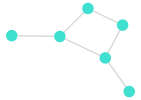

In [2]:
G = [
0 1 0 0 0 0;
1 0 1 1 0 0;
0 1 0 0 1 1;
0 1 0 0 1 0;
0 0 1 1 0 0;
0 0 1 0 0 0
]

g = SimpleGraph(G)
       
gplot(g)

In [3]:
vertex_cover = Model(GLPK.Optimizer)

@variable(vertex_cover, y[1:nv(g)], Bin)
@constraint(vertex_cover, [i = 1:nv(g), j = 1:nv(g); G[i,j] == 1], y[i] + y[j] >= 1)
@objective(vertex_cover, Min, sum(y))

optimize!(vertex_cover)
@show value.(y);

value.(y) = [0.0, 1.0, 1.0, 1.0, 0.0, 0.0]


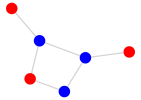

In [4]:
membership = convert(Array{Int},value.(y)) # Change to Int 
membership = membership + ones(Int, nv(g)) # Make the color groups one indexed
nodecolor = [colorant"red", colorant"blue"] # Blue to represent vertices in the cover
nodefillc = nodecolor[membership]
gplot(g, nodefillc = nodefillc)

## Dominating Set
A dominating set in a graph $G = (V, E)$ is a set $S \subset V$ such that 
for each vertex $v \in V$ either $v$ or one of its neighbour should be in $S$. 
Note that for some vertex $u$, $u$ and its neighbour both can be present in $S$.
We wish to find the smallest dominating set for a graph.
We model this problem as an ILP by defining a decision variable $x_{v}$ for each vertex $v \in V$ along with
a constraint for its neighbourhood.

$$
\begin{align*}
\min && \sum_{v \in V} x_{v} \\
s.t. && \sum_{u \in N(v)}x_{u} \geq 1 && \forall v \in V \\
&& x_{v} \in \{0,1\} && \forall v \in V
\end{align*}
$$

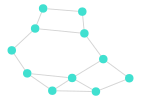

In [5]:
G = [
0 1 0 0 0 0 0 0 0 1 0 ;
1 0 1 0 0 0 0 0 0 0 1;
0 1 0 1 0 1 0 0 0 0 0;
0 0 1 0 1 0 0 0 0 0 0;
0 0 0 1 0 1 0 0 0 0 0;
0 0 1 0 1 0 1 0 0 0 0;
0 0 0 0 0 1 0 1 0 0 0;
0 0 0 0 0 0 1 0 1 0 1;
0 0 0 0 0 0 0 1 0 1 1;
1 0 0 0 0 0 0 0 1 0 1;
0 1 0 0 0 0 0 1 1 1 0
]

g = SimpleGraph(G)
       
gplot(g)

In [6]:
dominating_set = Model(GLPK.Optimizer)

@variable(dominating_set, x[1:nv(g)], Bin)
@constraint(dominating_set, [i = 1:nv(g)], sum(G[i,:] .* x) >= 1)
@objective(dominating_set, Min, sum(x))

optimize!(dominating_set)
@show value.(x);

value.(x) = [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]


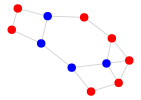

In [7]:
membership = convert(Array{Int},value.(x)) # Change to Int 
membership = membership + ones(Int, nv(g)) # Make the color groups one indexed
nodecolor = [colorant"red", colorant"blue"] # Blue to represent vertices in the set
nodefillc = nodecolor[membership]
gplot(g, nodefillc = nodefillc)

## Maximum Matching Problem
Given a graph $G = (V, E)$, a matching $M \subset E$ of $G$ is a collection of vertex disjoint edges. 
The size of the matching $M$ is the number of edges present in $M$ i.e. $|M|$. 
We wish to find the Maximum matching of $G$ i.e. a matching of maximum size.
We can solve this problem by modelling it as an integer linear program (ILP). 
We define a decision variable $m_{e}$ for each edge $e \in E$ and a constraint for each vertex $u \in V$ as follows:

$$
\begin{align*}
\max && \sum_{e \in E} m_{e} \\
s.t. && \sum_{e \sim u} m_{e} \leq 1 && \forall u \in V \\
&& m_{e} \in \{0,1\} && \forall e \in E
\end{align*}
$$

Let's now use JuMP to solve this problem for a sample graph.

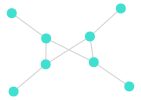

In [8]:
G = [
0 0 0 0 1 0 0 0;
0 0 0 0 0 1 0 0;
0 0 0 0 0 0 1 0;
0 0 0 0 0 0 0 1;
1 0 0 0 0 1 0 1;
0 1 0 0 1 0 1 0;
0 0 1 0 0 1 0 1;
0 0 0 1 1 0 1 0;
]

g = SimpleGraph(G)
       
gplot(g)

In [9]:
matching = Model(GLPK.Optimizer)

@variable(matching, m[i = 1:nv(g), j = 1:nv(g)], Bin)
@constraint(matching, [i = 1:nv(g)], sum(m[i,:]) <= 1)
@constraint(matching, [i = 1:nv(g), j = 1:nv(g); G[i,j] == 0], m[i,j] == 0)
@constraint(matching, [i = 1:nv(g), j = 1:nv(g)], m[i,j] == m[j,i])
@objective(matching, Max, sum(m))

optimize!(matching)
@show value.(m);

value.(m) = [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0; 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0]


The edges corresponding to the Matching are marked as one in the above matrix.

## k-Coloring Problem
A k-coloring of a graph $G=(V,E)$ is a function $c: V \rightarrow \{1,2...k\}$ such that 
$c(u) \neq c(v)$ for every edge $(u,v) \in E$. In other words, the numbers 1,2...k represent k colors, 
and adjacent vertices must have different colours.
The goal of a graph coloring problem is to find a minimum number of colours needed to colour a graph.

We model this problem as an ILP by defining a variable decision variable $z_{i}$ for each colour we have available.
Given an upper bound $k$ on the number of colors needed, 
we use $|V| \times k$ decision variables $c_{v,k}$ denoting if vertex $v$ is assigned color $k$.
Our model will become:

$$
\begin{align*}
\min && \sum_{i=1}^{k} z_{i} \\
s.t. && \sum_{i=1}^{k} c_{v,i} = 1 && \forall v \in V \\
&& c_{u,i} + c_{v,i} \leq 1 && \forall (u,v) \in V, i \in \{1,2...k\} \\
&& c_{v,i} \in \{0,1\} && \forall v \in V, i \in \{1,2...k\} \\
&& z_{i} \in \{0,1\} && \forall i \in \{1,2...k\}
\end{align*}
$$

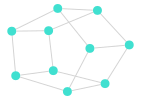

In [10]:
G = [
0 1 0 0 1 1 0 0 0 0;
1 0 1 0 0 0 1 0 0 0;
0 1 0 1 0 0 0 1 0 0;
0 0 1 0 1 0 0 0 1 0;
1 0 0 1 0 0 0 0 0 1;
1 0 0 0 0 0 1 0 0 1;
0 1 0 0 0 1 0 1 0 0;
0 0 1 0 0 0 1 0 1 0;
0 0 0 1 0 0 0 1 0 1;
0 0 0 0 1 1 0 0 1 0;
]

g = SimpleGraph(G)
       
gplot(g)

In [11]:
k = nv(g)

k_colouring = Model(GLPK.Optimizer)

@variable(k_colouring, z[1:k], Bin)
@variable(k_colouring, c[1:nv(g),1:k], Bin)
@constraint(k_colouring, [i = 1:nv(g)], sum(c[i,:]) == 1)
@constraint(k_colouring, [i = 1:nv(g), j = 1:nv(g), l = 1:k; G[i,j] == 1], c[i,l] + c[j,l] <= 1)
@constraint(k_colouring, [i = 1:nv(g), l = 1:k], c[i,l] <= z[l])

@objective(k_colouring, Min, sum(z))

optimize!(k_colouring)
@show value.(z);
@show value.(c);

value.(z) = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
value.(c) = [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]


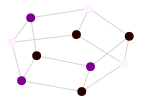

In [12]:
c = value.(c)
membership = zeros(nv(g))
for i in 1:nv(g)
    for j in 1:k
        if c[i,j] == 1
            membership[i] = j
            break
        end
    end
end
membership = convert(Array{Int},membership)

nodecolor = distinguishable_colors(nv(g), colorant"green")
nodefillc = nodecolor[membership]
gplot(g, nodefillc = nodefillc)